#  DTD classification project

* DTD is a texture database, consisting of 5640 images. There are 120 images for each category. Image sizes range between 300x300 and 640x640, and the images contain at least 90% of the surface representing the category attribute.

* We aim to randomly classify 11 classes (subset) of the 47 classes from the dataset.


##  Import module

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os                        # to read different files types from our system
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
from glob import glob            # to find the pathnames matching a specified patern 
import matplotlib.pyplot as plt

## Data preprocessing

DataLoader class:
In here the data classes are loaded and prepared to be transformed and then feed to the model.

In [2]:
class CustomDataset(Dataset):
  ## def __init__() : function that performs dataset preprocessing
  def __init__(self,data_path,phase,transform = None):
    classes,class_to_idx = find_classes(data_path)
    self.dir = data_path
    self.classes = classes
    self.class_to_idx = class_to_idx
    self.phase = phase
    self.transform = transform

    self.images = []
    self.labels = []
    
  # Images for the training mode are loaded from the corresponding folder

    if self.phase == 'train':
      for cls in self.classes:
        self.images += glob(f'{self.dir}/{cls}/*.jpg')
        iter = len(glob(f'{self.dir}/{cls}/*.jpg'))
        for i in range(iter):
          self.labels.append(self.class_to_idx[cls])
        
  # Images for the validation and test mode are loaded from the corresponding folder as well
    else:
      for cls in self.classes:
        self.images += glob(f'{self.dir}/{cls}/*.jpg')
        iter = len(glob(f'{self.dir}/{cls}/*.jpg'))
        for i in range(iter):
          self.labels.append(self.class_to_idx[cls])
    
    assert (len(self.images) == len(self.labels)) # check whether the number of label and data matches.
    
      ## def __len__():that function return the legnth of dataset
  def __len__(self):
    return len(self.images)

  ## def __getitem__() : Indexing function to get one specific sample from the dataset
  def __getitem__(self,idx):
    img = Image.open(self.images[idx]).convert('RGB')
    label = self.labels[idx]

    if self.transform is not None:
      img = self.transform(img,self.phase)
    return img,label
    

## Data Transformation
The loaded data are transformed into Tensor and normalised around the mean and std. We flip the images horizontally at random. This is done to prevent Overfitting.

In [3]:
 from torchvision import models, transforms

class MyTransform:
    
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'train': transforms.Compose([
                transforms.RandomResizedCrop(
                    (resize, resize), scale=(0.5, 1.0)),  
                transforms.RandomHorizontalFlip(), 
                transforms.ToTensor(),  
                transforms.Normalize(mean, std)  
            ]),
            'val': transforms.Compose([
                transforms.Resize((resize, resize)),
                transforms.ToTensor(),  
                transforms.Normalize(mean, std)  
            ]),
            'test': transforms.Compose([
                transforms.Resize((resize, resize)),
                transforms.ToTensor(),  
                transforms.Normalize(mean, std) 
            ])
        }

    def __call__(self,img,phase):

        return self.data_transform[phase](img)

## Data Loading

In [4]:
def find_classes(dir):
  classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
  classes.sort()
  class_to_idx = {classes[i]: i for i in range(len(classes))}
  return classes, class_to_idx

In [5]:
# The images are in a folder named 'C:/Users/amankou anicet/Downloads/'
path = "C:/Users/amankou anicet/Downloads/" 
classes,class_dict = find_classes(path + 'DTD_11/train')
classes

['banded',
 'cracked',
 'dotted',
 'fibrous',
 'grooved',
 'honeycombed',
 'interlaced',
 'knitted',
 'lined',
 'marbled',
 'woven']

## Apply transformation
The transform method is applied Loaded dataset from each class. The images are transformed into Tensor that are the core data structure used in Pytorch. 

In [6]:
# size, mean ,std
size = 224            # Standardize image size
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

train_dataset = CustomDataset(data_path = path + 'DTD_11/train', phase = 'train',transform = MyTransform(size,mean,std))
valid_dataset = CustomDataset(data_path = path + 'DTD_11/val', phase = 'test',transform = MyTransform(size,mean,std))
test_dataset = CustomDataset(data_path = path + 'DTD_11/test', phase = 'test',transform = MyTransform(size,mean,std))

## Generate dataloader

In [8]:
batch_size = 4

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True)

val_dataloader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False)

# Organise into dictionary objects
dataloaders = {"train": train_dataloader, "val": val_dataloader, "test" : test_dataloader}

## Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 224, 224]) torch.Size([4])


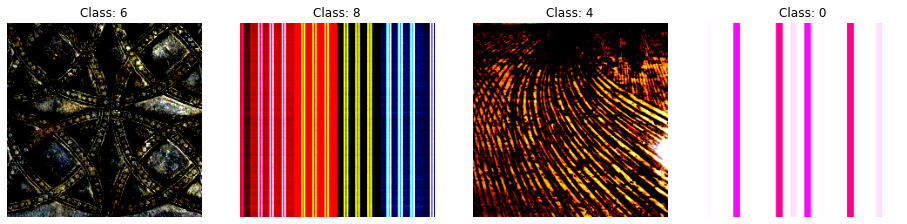

In [9]:
# Trainloader visualization
X_train, y_train = next(iter(train_dataloader))
print(X_train.shape, y_train.shape)

pltsize = 4
plt.figure(figsize=(4 * pltsize, pltsize))


for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.axis('off')
      plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
      plt.title('Class: ' + str(y_train[i].item()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 224, 224]) torch.Size([4])


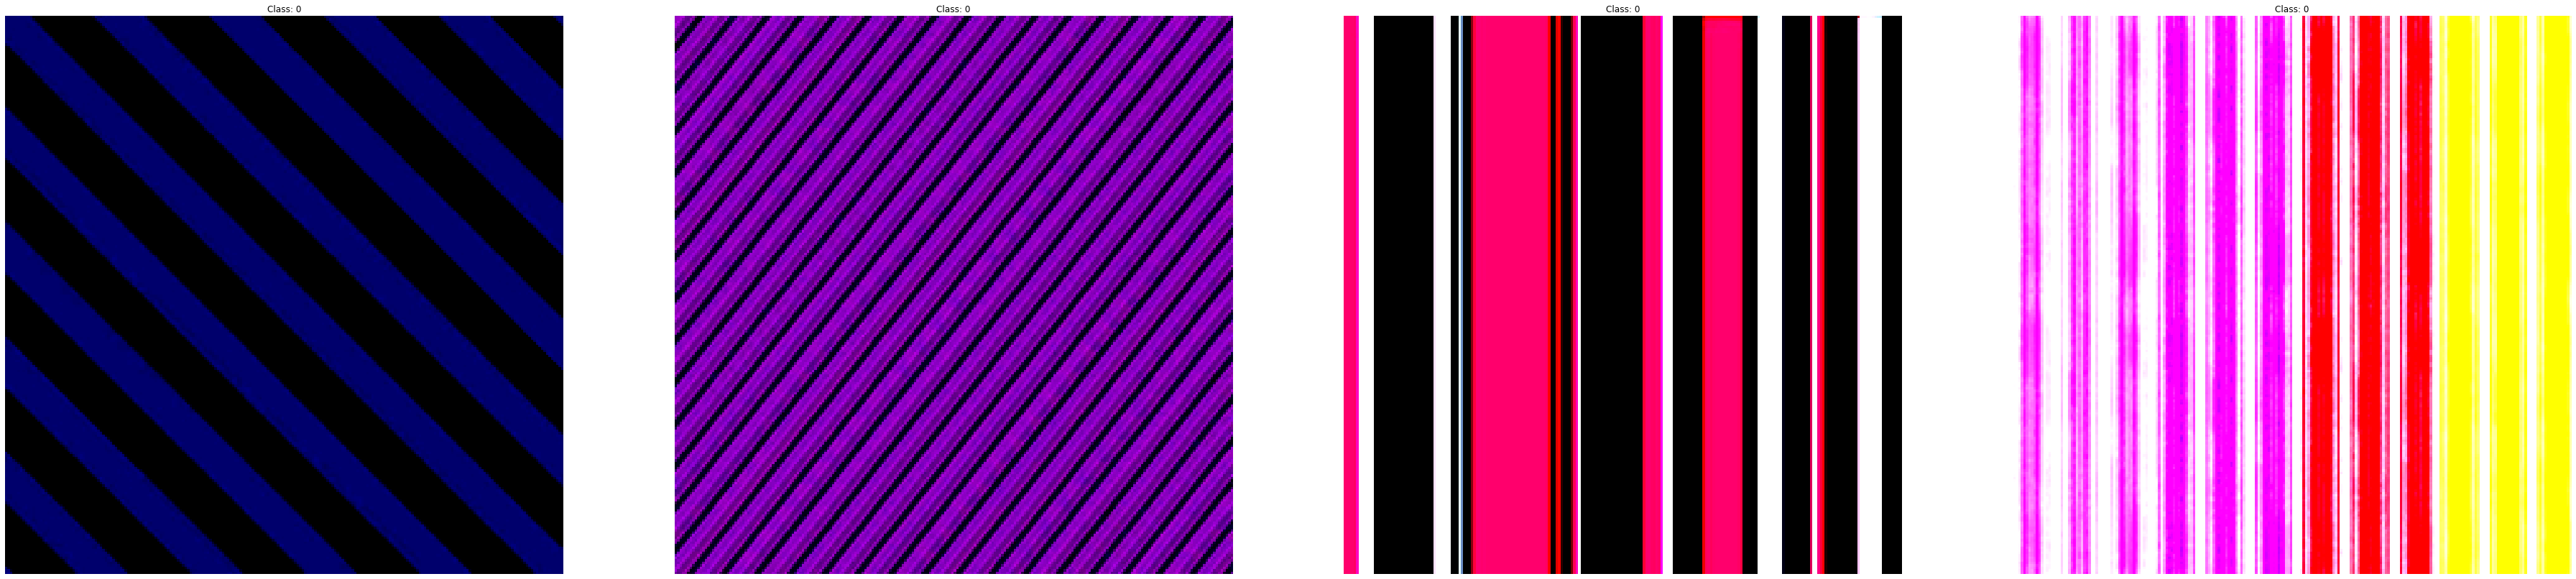

In [10]:
# Testloader visualisation
X_test, y_test = next(iter(test_dataloader))
print(X_test.shape, y_test.shape)

pltsize = 16
plt.figure(figsize=(4 * pltsize, pltsize))

for i in range(4):
      plt.subplot(1, 4, i + 1)
      plt.axis('off')
      plt.imshow(np.transpose(X_test[i], (1, 2, 0)))
      plt.title('Class: ' + str(y_test[i].item()))

## Model implementation

In [18]:
class Mynet(nn.Module):
    def __init__(self):
        super(Mynet, self).__init__()
        
# In the init function, we define each layer we will use in our model
# Our images are RGB, so 3 input image channels, 16 output channels or filters, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3,6,kernel_size=3,stride=1,padding=0, bias=True)
        self.conv2 = nn.Conv2d(6, 12,kernel_size=3,stride=1, padding=0, bias = True)
        self.pool = nn.MaxPool2d(kernel_size = 2)
 # A drop layer deletes 50% of the features to help to prevent overfitting
        self.drop = nn.Dropout2d(0.5) 
# Our 224x224 image tensors will be pooled twice with a kernel of size 2. 224/2/2 is .
# This means that our feature tensors are now 54 x 54, and we've generated 24 of them     
        self.fc1 = nn.Linear(12*54*54,256)
        self.fc2 = nn.Linear(256, 11)       
    def forward(self, x):
        
# Use a ReLU activation function after layer 1  (convolution 1 and pool)        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
# Pass data through dropout
        x = F.dropout(self.drop(x), training = self.training)  
# Flatten  x with start_dim = 1
        x = torch.flatten(x, 1)
# Pass data through fc1
        x = self.fc1(x)
        x = self.fc2(x)
 # Return class probabilities via a log_softmax function 
        return torch.log_softmax(x, dim=1)

device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"

# Create an instance of the model class and allocate it to the device
model = Mynet().to(device)  
print(model)

Mynet(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=34992, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=11, bias=True)
)


## Training and validation

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

## Training and validation

In [20]:
loss_record = []
acc_train_record = []
acc_valid_record = []

# Process the images in batches
for epoch in range(200):
    
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for i, data_train in enumerate(train_dataloader, 0):
        
        imgs_train, labels_train = data_train
        
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        
        imgs_train = imgs_train.to(device)
        labels_train = labels_train.to(device)
        
        optimizer.zero_grad()
        # Push the data forward through the model layers
        outputs_train = model(imgs_train)
        # Get the loss
        loss = criterion(outputs_train, labels_train)
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        
        _, labelPred_train = torch.max(outputs_train.data, 1)
        total_train += labels_train.size(0)
        correct_train += (labelPred_train == labels_train).sum().item()
            
        if i == (len(train_dataloader)-1):
            print(f'\n ******************** Model performance after {epoch + 1} epochs ********************')
            
            print(f'Loss: {train_loss / len(train_dataloader):.3f}')
            loss_record.append(train_loss)
            train_loss = 0.0
            
            acc_train = 100 * correct_train // total_train
            acc_train_record.append(acc_train)
            print(f'Accuracy on train dataset: {acc_train}%')
            correct_train = 0
            total_train = 0
            
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for data_valid in val_dataloader:
                    imgs_valid, labels_valid = data_valid
                    
                    imgs_valid = imgs_valid.to(device)
                    labels_valid = labels_valid.to(device)
                    
                    outputs_valid = model(imgs_valid)

                    _, labelPred_valid = torch.max(outputs_valid.data, 1)
                    total_valid += labels_valid.size(0)
                    correct_valid += (labelPred_valid == labels_valid).sum().item()
            
            acc_valid = 100 * correct_valid // total_valid
            acc_valid_record.append(acc_valid)
            print(f'Accuracy on valid dataset: {acc_valid}%')

print('Train finished')


correct_test = 0
total_test = 0

with torch.no_grad():
    for data_test in test_dataloader:
        imgs_test, labels_test = data_test
        
        imgs_test = imgs_test.to(device)
        labels_test = labels_test.to(device)
        
        outputs_test = model(imgs_test)

        _, labelPred_test = torch.max(outputs_test.data, 1)
        total_test += labels_test.size(0)
        correct_test += (labelPred_test == labels_test).sum().item()

acc_test = 100 * correct_test // total_test
print(f'\n @@@@@@@@@@@@@@@@@@@@ Accuracy on test dataset: {acc_test}%')



 ******************** Model performance after 1 epochs ********************
Loss: 2.412
Accuracy on train dataset: 8%
Accuracy on valid dataset: 7%

 ******************** Model performance after 2 epochs ********************
Loss: 2.418
Accuracy on train dataset: 7%
Accuracy on valid dataset: 6%

 ******************** Model performance after 3 epochs ********************
Loss: 2.414
Accuracy on train dataset: 7%
Accuracy on valid dataset: 4%

 ******************** Model performance after 4 epochs ********************
Loss: 2.416
Accuracy on train dataset: 9%
Accuracy on valid dataset: 6%

 ******************** Model performance after 5 epochs ********************
Loss: 2.423
Accuracy on train dataset: 7%
Accuracy on valid dataset: 9%

 ******************** Model performance after 6 epochs ********************
Loss: 2.408
Accuracy on train dataset: 8%
Accuracy on valid dataset: 7%

 ******************** Model performance after 7 epochs ********************
Loss: 2.410
Accuracy on train

Accuracy on valid dataset: 7%

 ******************** Model performance after 56 epochs ********************
Loss: 2.414
Accuracy on train dataset: 8%
Accuracy on valid dataset: 11%

 ******************** Model performance after 57 epochs ********************
Loss: 2.412
Accuracy on train dataset: 8%
Accuracy on valid dataset: 4%

 ******************** Model performance after 58 epochs ********************
Loss: 2.415
Accuracy on train dataset: 8%
Accuracy on valid dataset: 8%

 ******************** Model performance after 59 epochs ********************
Loss: 2.418
Accuracy on train dataset: 9%
Accuracy on valid dataset: 10%

 ******************** Model performance after 60 epochs ********************
Loss: 2.423
Accuracy on train dataset: 6%
Accuracy on valid dataset: 5%

 ******************** Model performance after 61 epochs ********************
Loss: 2.411
Accuracy on train dataset: 8%
Accuracy on valid dataset: 8%

 ******************** Model performance after 62 epochs ***********

Accuracy on valid dataset: 9%

 ******************** Model performance after 111 epochs ********************
Loss: 2.419
Accuracy on train dataset: 7%
Accuracy on valid dataset: 7%

 ******************** Model performance after 112 epochs ********************
Loss: 2.417
Accuracy on train dataset: 8%
Accuracy on valid dataset: 6%

 ******************** Model performance after 113 epochs ********************
Loss: 2.411
Accuracy on train dataset: 8%
Accuracy on valid dataset: 9%

 ******************** Model performance after 114 epochs ********************
Loss: 2.415
Accuracy on train dataset: 8%
Accuracy on valid dataset: 6%

 ******************** Model performance after 115 epochs ********************
Loss: 2.411
Accuracy on train dataset: 7%
Accuracy on valid dataset: 6%

 ******************** Model performance after 116 epochs ********************
Loss: 2.406
Accuracy on train dataset: 8%
Accuracy on valid dataset: 7%

 ******************** Model performance after 117 epochs ******


 ******************** Model performance after 165 epochs ********************
Loss: 2.409
Accuracy on train dataset: 8%
Accuracy on valid dataset: 9%

 ******************** Model performance after 166 epochs ********************
Loss: 2.414
Accuracy on train dataset: 8%
Accuracy on valid dataset: 11%

 ******************** Model performance after 167 epochs ********************
Loss: 2.416
Accuracy on train dataset: 8%
Accuracy on valid dataset: 7%

 ******************** Model performance after 168 epochs ********************
Loss: 2.403
Accuracy on train dataset: 10%
Accuracy on valid dataset: 12%

 ******************** Model performance after 169 epochs ********************
Loss: 2.416
Accuracy on train dataset: 7%
Accuracy on valid dataset: 6%

 ******************** Model performance after 170 epochs ********************
Loss: 2.417
Accuracy on train dataset: 8%
Accuracy on valid dataset: 6%

 ******************** Model performance after 171 epochs ********************
Loss: 2.408


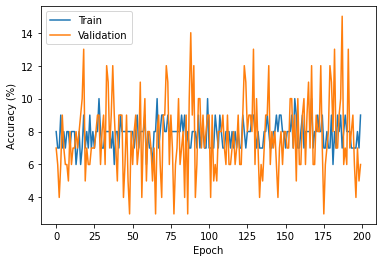

In [21]:
plt.plot(acc_train_record)
plt.plot(acc_valid_record)
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## Changing the model and increase the number of epochs

* Here the model is slightly changed,
* Two more convolution layers are added,
* The hyperparameter "number of epoch" is changed from 200 to 300,
* The number of pooling layer is increased from 2 to 4 aplied after each convolution layer,

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Mynet2(nn.Module):
    def __init__(self):


        
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, stride=1, padding=0, bias=True)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 12, 3, stride=1, padding=0, bias=True)
        self.conv3 = nn.Conv2d(12, 24, 3, stride=1, padding=0, bias=True)
        self.conv4 = nn.Conv2d(24, 48, 3, stride=1, padding=0, bias=True)
        self.fc1 = nn.Linear(48*12*12, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 11)

    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

convNet = Mynet2().to(device)

import torch.optim as optim

criterion2 = nn.CrossEntropyLoss().to(device)
optimizer2 = optim.Adam(convNet.parameters(), lr=0.001, betas=(0.9, 0.999))

loss_record2 = []
acc_train_record2 = []
acc_valid_record2 = []

for epoch in range(300):
    
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for i, data_train in enumerate(train_dataloader, 0):
        
        imgs_train, labels_train = data_train
        
        imgs_train = imgs_train.to(device)
        labels_train = labels_train.to(device)
        
        optimizer2.zero_grad()
        
        outputs_train = convNet(imgs_train)
        loss = criterion2(outputs_train, labels_train)
        loss.backward()
        optimizer2.step()
        
        train_loss += loss.item()
        
        
        _, labelPred_train = torch.max(outputs_train.data, 1)
        total_train += labels_train.size(0)
        correct_train += (labelPred_train == labels_train).sum().item()
            
        if i == (len(train_dataloader)-1):
            print(f'\n ******************** Model performance after {epoch + 1} epochs ********************')
            
            print(f'Loss: {train_loss / len(train_dataloader):.3f}')
            loss_record2.append(train_loss)
            train_loss = 0.0
            
            acc_train = 100 * correct_train // total_train
            acc_train_record2.append(acc_train)
            print(f'Accuracy on train dataset: {acc_train}%')
            correct_train = 0
            total_train = 0
            
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for data_valid in val_dataloader:
                    imgs_valid, labels_valid = data_valid
                    
                    imgs_valid = imgs_valid.to(device)
                    labels_valid = labels_valid.to(device)
                    
                    outputs_valid = convNet(imgs_valid)

                    _, labelPred_valid = torch.max(outputs_valid.data, 1)
                    total_valid += labels_valid.size(0)
                    correct_valid += (labelPred_valid == labels_valid).sum().item()
            
            acc_valid = 100 * correct_valid // total_valid
            acc_valid_record2.append(acc_valid)
            print(f'Accuracy on valid dataset: {acc_valid}%')

print('Train finished')


correct_test2 = 0
total_test2 = 0

with torch.no_grad():
    for data_test in test_dataloader:
        imgs_test, labels_test = data_test
        
        imgs_test = imgs_test.to(device)
        labels_test = labels_test.to(device)
        
        outputs_test = convNet(imgs_test)

        _, labelPred_test = torch.max(outputs_test.data, 1)
        total_test2 += labels_test.size(0)
        correct_test2 += (labelPred_test == labels_test).sum().item()

acc_test2 = 100 * correct_test2 // total_test2



 ******************** Model performance after 1 epochs ********************
Loss: 2.395
Accuracy on train dataset: 10%
Accuracy on valid dataset: 13%

 ******************** Model performance after 2 epochs ********************
Loss: 2.323
Accuracy on train dataset: 13%
Accuracy on valid dataset: 14%

 ******************** Model performance after 3 epochs ********************
Loss: 2.238
Accuracy on train dataset: 15%
Accuracy on valid dataset: 13%

 ******************** Model performance after 4 epochs ********************
Loss: 2.185
Accuracy on train dataset: 17%
Accuracy on valid dataset: 20%

 ******************** Model performance after 5 epochs ********************
Loss: 2.140
Accuracy on train dataset: 19%
Accuracy on valid dataset: 13%

 ******************** Model performance after 6 epochs ********************
Loss: 2.077
Accuracy on train dataset: 22%
Accuracy on valid dataset: 22%

 ******************** Model performance after 7 epochs ********************
Loss: 2.056
Accur


 ******************** Model performance after 55 epochs ********************
Loss: 0.679
Accuracy on train dataset: 77%
Accuracy on valid dataset: 58%

 ******************** Model performance after 56 epochs ********************
Loss: 0.658
Accuracy on train dataset: 78%
Accuracy on valid dataset: 59%

 ******************** Model performance after 57 epochs ********************
Loss: 0.665
Accuracy on train dataset: 76%
Accuracy on valid dataset: 58%

 ******************** Model performance after 58 epochs ********************
Loss: 0.636
Accuracy on train dataset: 79%
Accuracy on valid dataset: 53%

 ******************** Model performance after 59 epochs ********************
Loss: 0.635
Accuracy on train dataset: 78%
Accuracy on valid dataset: 54%

 ******************** Model performance after 60 epochs ********************
Loss: 0.654
Accuracy on train dataset: 76%
Accuracy on valid dataset: 53%

 ******************** Model performance after 61 epochs ********************
Loss: 0.63


 ******************** Model performance after 109 epochs ********************
Loss: 0.407
Accuracy on train dataset: 86%
Accuracy on valid dataset: 57%

 ******************** Model performance after 110 epochs ********************
Loss: 0.440
Accuracy on train dataset: 85%
Accuracy on valid dataset: 57%

 ******************** Model performance after 111 epochs ********************
Loss: 0.401
Accuracy on train dataset: 86%
Accuracy on valid dataset: 54%

 ******************** Model performance after 112 epochs ********************
Loss: 0.489
Accuracy on train dataset: 85%
Accuracy on valid dataset: 60%

 ******************** Model performance after 113 epochs ********************
Loss: 0.531
Accuracy on train dataset: 83%
Accuracy on valid dataset: 56%

 ******************** Model performance after 114 epochs ********************
Loss: 0.432
Accuracy on train dataset: 85%
Accuracy on valid dataset: 53%

 ******************** Model performance after 115 epochs ********************
Los

Accuracy on valid dataset: 57%

 ******************** Model performance after 163 epochs ********************
Loss: 0.396
Accuracy on train dataset: 88%
Accuracy on valid dataset: 51%

 ******************** Model performance after 164 epochs ********************
Loss: 0.285
Accuracy on train dataset: 91%
Accuracy on valid dataset: 59%

 ******************** Model performance after 165 epochs ********************
Loss: 0.359
Accuracy on train dataset: 88%
Accuracy on valid dataset: 59%

 ******************** Model performance after 166 epochs ********************
Loss: 0.282
Accuracy on train dataset: 90%
Accuracy on valid dataset: 59%

 ******************** Model performance after 167 epochs ********************
Loss: 0.368
Accuracy on train dataset: 87%
Accuracy on valid dataset: 60%

 ******************** Model performance after 168 epochs ********************
Loss: 0.326
Accuracy on train dataset: 88%
Accuracy on valid dataset: 56%

 ******************** Model performance after 169 

Accuracy on valid dataset: 54%

 ******************** Model performance after 217 epochs ********************
Loss: 0.273
Accuracy on train dataset: 90%
Accuracy on valid dataset: 57%

 ******************** Model performance after 218 epochs ********************
Loss: 0.250
Accuracy on train dataset: 92%
Accuracy on valid dataset: 56%

 ******************** Model performance after 219 epochs ********************
Loss: 0.254
Accuracy on train dataset: 91%
Accuracy on valid dataset: 60%

 ******************** Model performance after 220 epochs ********************
Loss: 0.234
Accuracy on train dataset: 91%
Accuracy on valid dataset: 59%

 ******************** Model performance after 221 epochs ********************
Loss: 0.320
Accuracy on train dataset: 89%
Accuracy on valid dataset: 58%

 ******************** Model performance after 222 epochs ********************
Loss: 0.406
Accuracy on train dataset: 88%
Accuracy on valid dataset: 53%

 ******************** Model performance after 223 

Accuracy on valid dataset: 61%

 ******************** Model performance after 271 epochs ********************
Loss: 0.339
Accuracy on train dataset: 89%
Accuracy on valid dataset: 58%

 ******************** Model performance after 272 epochs ********************
Loss: 0.206
Accuracy on train dataset: 93%
Accuracy on valid dataset: 58%

 ******************** Model performance after 273 epochs ********************
Loss: 0.384
Accuracy on train dataset: 89%
Accuracy on valid dataset: 57%

 ******************** Model performance after 274 epochs ********************
Loss: 0.178
Accuracy on train dataset: 94%
Accuracy on valid dataset: 62%

 ******************** Model performance after 275 epochs ********************
Loss: 0.197
Accuracy on train dataset: 92%
Accuracy on valid dataset: 58%

 ******************** Model performance after 276 epochs ********************
Loss: 0.225
Accuracy on train dataset: 93%
Accuracy on valid dataset: 62%

 ******************** Model performance after 277 

NameError: name 'acc_test8' is not defined


 @@@@@@@@@@@@@@@@@@@@ Accuracy on test dataset: 63%


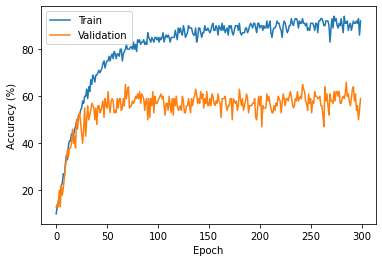

In [33]:
print(f'\n @@@@@@@@@@@@@@@@@@@@ Accuracy on test dataset: {acc_test2}%')
plt.plot(acc_train_record2)
plt.plot(acc_valid_record2)
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted:  grooved banded banded banded


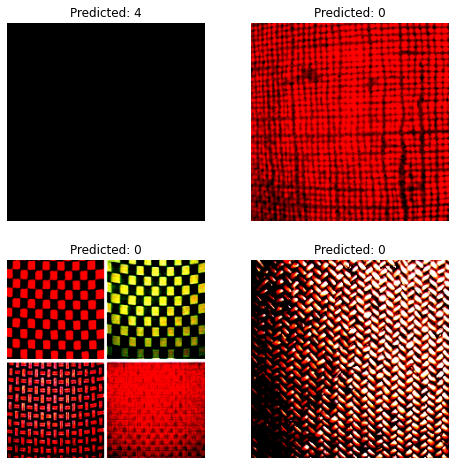

In [31]:
outputs = convNet(X_test)       
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

fig = plt.figure(figsize=(8, 8))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(images[i].permute(1, 2, 0).numpy())
    ax.set_title(f"Predicted: {predicted[i]}")
    ax.axis("off")
plt.show()


In [29]:
test_correct = 0
test_total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = convNet(images)    
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * test_correct // test_total} %')

Accuracy of the network on the test images: 63 %


In [30]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = convNet(images) 
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: banded is 58.3 %
Accuracy for class: cracked is 66.7 %
Accuracy for class: dotted is 66.7 %
Accuracy for class: fibrous is 58.3 %
Accuracy for class: grooved is 66.7 %
Accuracy for class: honeycombed is 75.0 %
Accuracy for class: interlaced is 83.3 %
Accuracy for class: knitted is 58.3 %
Accuracy for class: lined is 58.3 %
Accuracy for class: marbled is 58.3 %
Accuracy for class: woven is 50.0 %
